In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio
import numpy as np


In [2]:
# loading shape file
path=r"data/shape_data/local_unit.shp"
#Reading shape file data
gdf=gpd.read_file(path)
print (gdf.head())

   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  


In [4]:
#check for missing values
print(gdf.isnull().sum())

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


Text(1062.5517676767674, 0.5, 'Latitude')

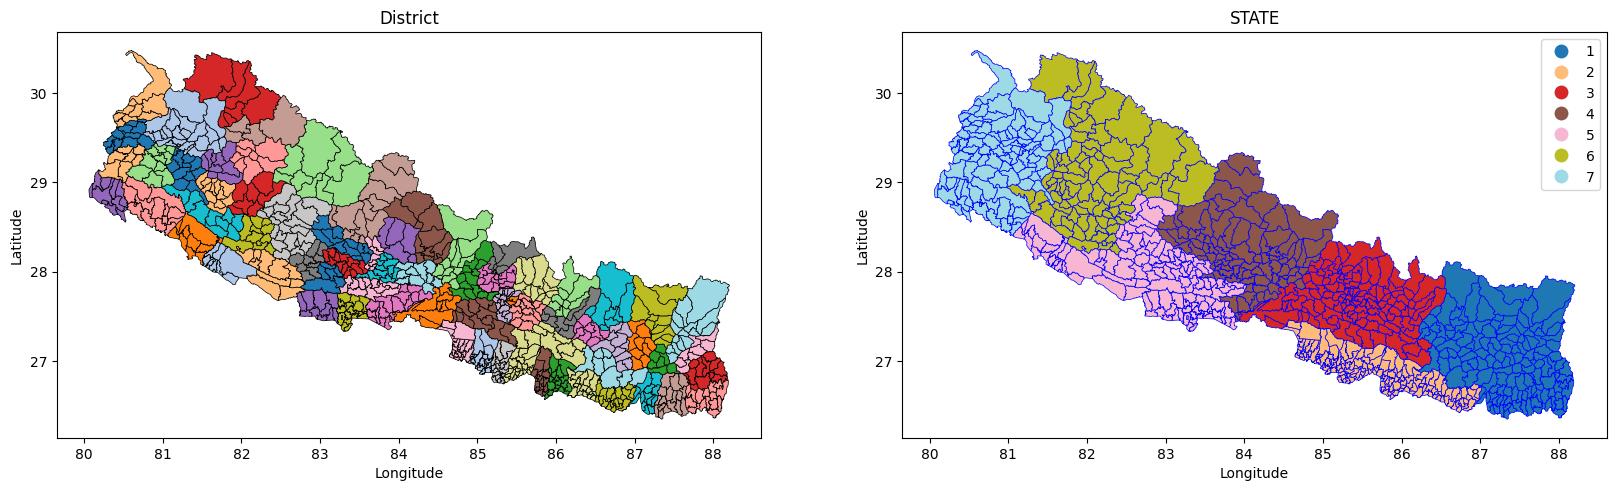

In [ ]:
# gdf.plot(column="DISTRICT", cmap="viridis")
# plt.title("Map of Local Bodies marked with District")
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()
fig,axes=plt.subplots(1,2,figsize=(20,8))
gdf.plot(column='DISTRICT',ax=axes[0],categorical=True,cmap='tab20',linewidth=0.5,edgecolor='black')
axes[0].set_title("District")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
gdf.plot(column='STATE_CODE',categorical=True,cmap='tab20',linewidth=0.5,edgecolor='blue',ax=axes[1])
axes[1].set_title("STATE")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")





In [5]:
# defining path for raster data
path_nepal_temperature_2020=r"data/nepal_climate_data/nepal_temperature_2020.tif"
path_nepal_temperature_2050=r"data/nepal_climate_data/nepal_temperature_2050.tif"
path_nepal_precipitation_2020=r"data/nepal_climate_data/nepal_precipitation_2020.tif"
path_nepal_precipitation_2050=r"data/nepal_climate_data/nepal_precipitation_2050.tif"

def load_raster_data(file_path):
    # load the raster data
    with rasterio.open(file_path)as src:    
        data=src.read(1) #read the first head
        return data

    
temperature_2020=load_raster_data(path_nepal_temperature_2020)
temperature_2050=load_raster_data(path_nepal_temperature_2050)
precipitation_2020=load_raster_data(path_nepal_precipitation_2020)
precipitation_2050=load_raster_data(path_nepal_precipitation_2050)



In [6]:
#Basic Statistics of nepal_temperature_data 2020
print("statistics of temperature 2020")
print("Min:",np.min(temperature_2020))
print("Median:",np.median(temperature_2020))
print("Max:",np.max(temperature_2020))
print("Std dev:",np.std(temperature_2020))

#Basic statistics of nepal_temperature_data 2050

print("\nstatistics of temperature 2050")
print("Min:",np.min(temperature_2050))
print("Median:",np.median(temperature_2050))
print("Max:",np.max(temperature_2050))
print("Std dev:",np.std(temperature_2050))


statistics of temperature 2020
Min: -23.198749681712457
Median: -7.685702505675591
Max: 8.138670708338557
Std dev: 7.295507583300802

statistics of temperature 2050
Min: -22.08736312988644
Median: -5.578674327456623
Max: 11.473132313566794
Std dev: 7.159036215292309


<function matplotlib.pyplot.show(close=None, block=None)>

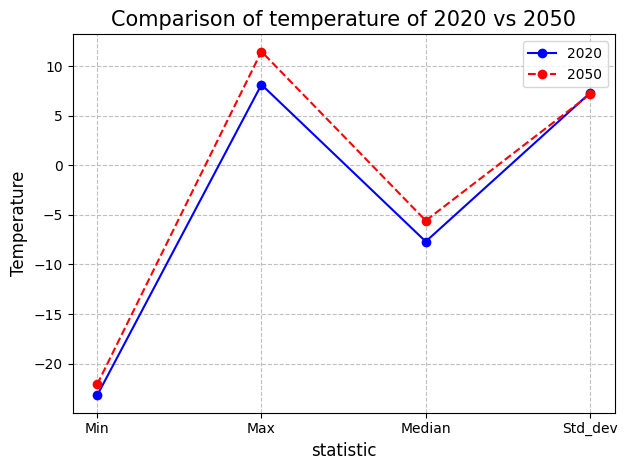

In [7]:
temperature_2020_statistics ={
    "Min":np.min(temperature_2020),
    "Max":np.max(temperature_2020),
    "Median":np.median(temperature_2020),
    "Std_dev":np.std(temperature_2020)
}

temperature_2050_statistics ={
    "Min":np.min(temperature_2050),
    "Max":np.max(temperature_2050),
    "Median":np.median(temperature_2050),
    "Std_dev":np.std(temperature_2050)

}

#comparing temperature data in line chart
labels=list(temperature_2020_statistics.keys())
stats_2020=list(temperature_2020_statistics.values())
stats_2050=list(temperature_2050_statistics.values())



#plot lines for 2020 and  2050
plt.plot(labels, stats_2020, marker='o',linestyle='-', color='blue',label='2020')
plt.plot(labels, stats_2050,marker='o',linestyle='--', color='red',label='2050')

#labels and title
plt.xlabel("statistic", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.title("Comparison of temperature of 2020 vs 2050" , fontsize=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show


#FINDIGS:-
-Increase in Minimum Temperature:
The minimum temperature in 2050 is slightly higher than in 2020, suggesting that the coldest days are becoming warmer.

-Increase in Maximum Temperature:
The maximum temperature in 2050 is also higher than in 2020, indicating hotter peak temperatures in the future.

-Median Temperature is Higher:
The median temperature in 2050 is less negative compared to 2020, showing an overall shift towards warmer conditions.

-Standard Deviation is Similar:
The standard deviation (a measure of variation) is roughly the same for both years, implying that the variability in temperature remains consistent even though the overall temperatures are rising.

#Conclusion:
The graph clearly indicates a trend of global warming from 2020 to 2050, with both the minimum and maximum temperatures increasing. While the variability stays the same, the entire temperature range has shifted upward, reflecting a warming climate.

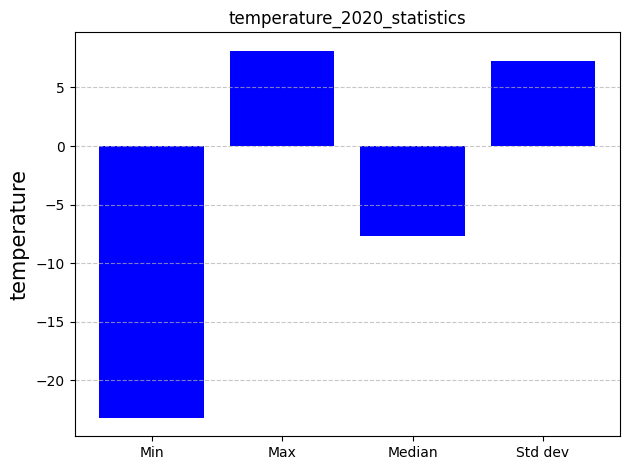

In [8]:


#bar plot for temperature 2020
labels = ['Min','Max','Median','Std dev']
values =list(temperature_2020_statistics.values())
plt.bar(labels,values,color='blue')

#labeling the plot
plt.title("temperature_2020_statistics")
plt.ylabel("temperature",fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

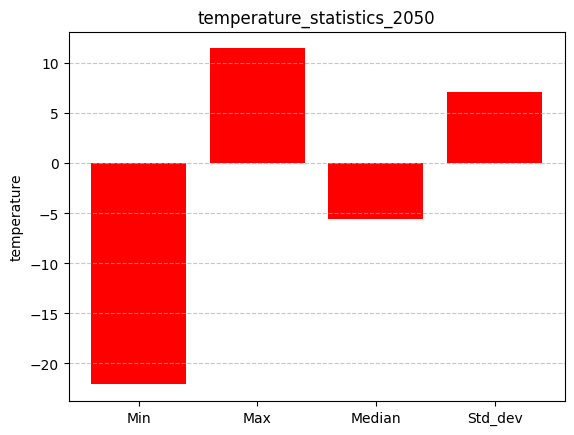

In [9]:
#barplot for temperature_2050_statistics
labels=['Min','Max','Median','Std_dev']
values=list(temperature_2050_statistics.values())
plt.bar(labels,values,color='red')
#labeling the plot
plt.title('temperature_statistics_2050')
plt.ylabel('temperature')
plt.grid(axis='y',linestyle='--',alpha=0.7)

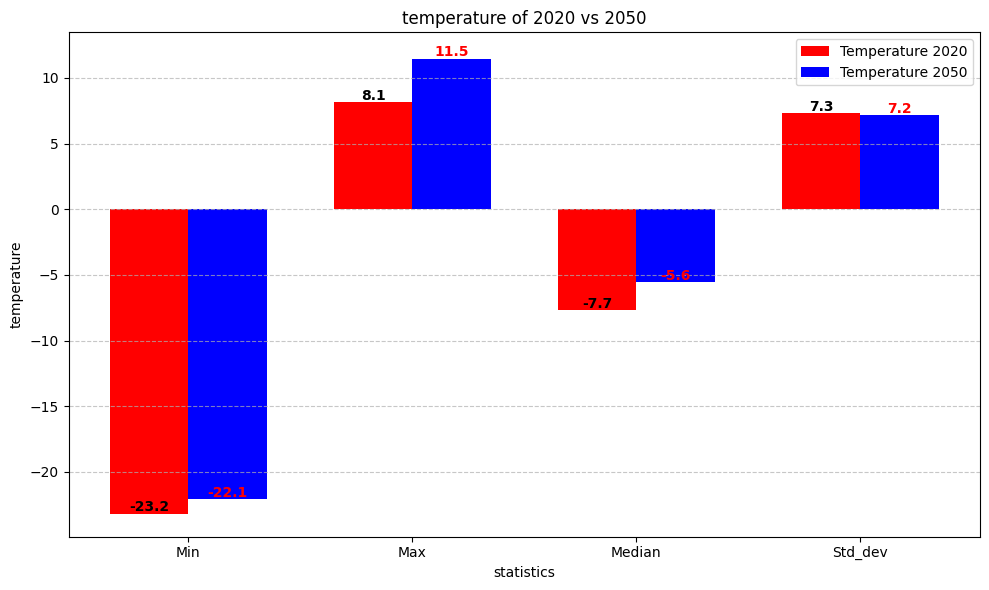

In [11]:
#comparison of temperature_2020_statistics vs temperature_2050_statistics
#label and values for the statistics
labels=list(temperature_2020_statistics.keys())
values_2020=list(temperature_2020_statistics.values())
values_2050=list(temperature_2050_statistics.values())
#set the position of the bars on x-axis
x=np.arange(len(labels))
width=0.35 # the width of the bars
#create grouped bar plot
fig, ax=plt.subplots(figsize=(10,6))
bar1=ax.bar(x- width/2,values_2020,width,label='Temperature 2020',color='red')
bar2=ax.bar(x+width/2,values_2050,width,label='Temperature 2050',color='blue')
#labeling the plot
ax.set_xlabel('statistics')
ax.set_ylabel('temperature')
ax.set_title('temperature of 2020 vs 2050')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#add value labels on top of each bar
def add_labels(bars,color):
    for bar in bars:
         yval = bar.get_height()
         ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center',va='center',color=color,fontsize=10,fontweight='bold')
         ax.set_ylim(top=max(max(values_2020), max(values_2050)) + 2)


add_labels(bar1, color='black')
add_labels(bar2, color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Display the plot
plt.tight_layout()
plt.show()


#CONCLUSION:
-The data clearly shows that Nepal is expected to experience a warming trend by 2050 — with higher minimum, maximum, and median temperatures. This implies a general shift toward a warmer climate, which could have serious implications on agriculture, water resources, and ecosystems.

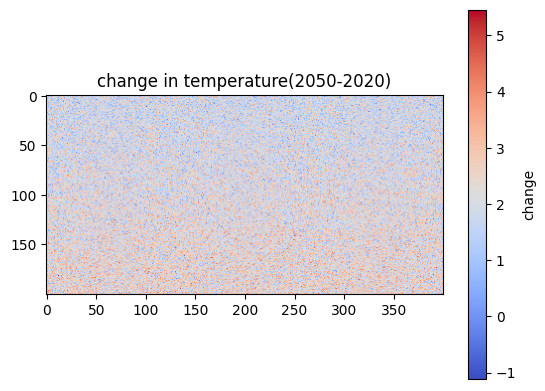

In [12]:
# calculate change
change=temperature_2050-temperature_2020
plt.imshow(change, cmap='coolwarm')
plt.title("change in temperature(2050-2020)")
plt.colorbar(label='change')
plt.show()

In [13]:
def get_monthly_value(year_data):
    return[year_data[i] for i in range(1,13)]
def get_month_mean_value(year_data):
    return[np.mean(month) for month in get_monthly_value(year_data)]

Comparing month wise trend for temperature data for both 2020 and 2050
    

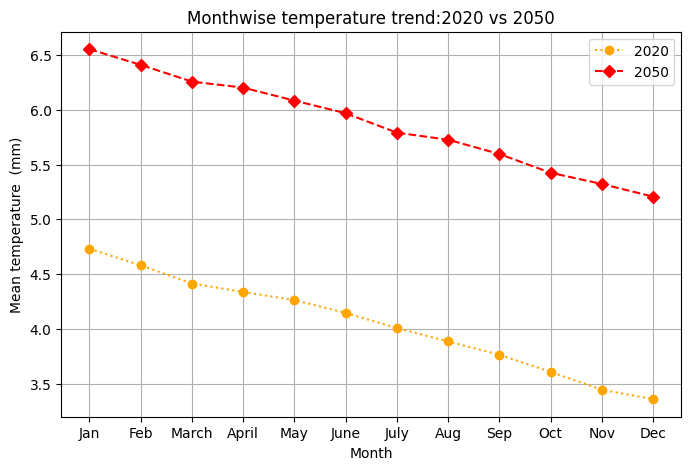

In [14]:
plt.figure(figsize=(8,5))
plt.plot(range(1,13),get_month_mean_value(temperature_2020),marker='o',linestyle='dotted',color='orange',label='2020')
plt.plot(range(1,13),get_month_mean_value(temperature_2050),marker='D',linestyle='--',color='red',label='2050')    
plt.xticks(range(1,13),["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Mean temperature  (mm)")
plt.title("Monthwise temperature trend:2020 vs 2050")
plt.legend()
plt.grid()
plt.show()  


#FINDINGS:-

-Overall Increase in Temperature:
The mean monthly temperature in 2050 (red line) is consistently higher than in 2020 (yellow line) across all months.

S-teady Downward Trend in Both Years:
Both 2020 and 2050 show a gradual decrease in temperature from January to December, indicating a seasonal pattern.

-Larger Temperature Gap in Later Months:
The difference between 2020 and 2050 temperatures appears to widen slightly towards the end of the year (October to December), suggesting that future winters may be significantly warmer.

-Shift in Climate Patterns:
The higher temperature line for 2050 throughout the year indicates a general warming trend, potentially due to climate change or global warming effects.

#Conclusion:-
-There is a clear indication of global warming when comparing monthwise temperature trends between 2020 and 2050. The entire year in 2050 is projected to be warmer than in 2020, with more noticeable increases in the colder months. This consistent rise in mean temperature may have significant environmental and societal impacts.

Basic Statistics of Precipitation

In [15]:
#Basic Statistics of precipitation 2020
print('Statistics of Precipitation of 2020')
print('Mean:',np.mean(precipitation_2020))
print('Max:',np.max(precipitation_2020))
print('Median:',np.median(precipitation_2020))
print('Std_dev:',np.std(precipitation_2020))

#Basic Statistics of precipitation 2050
print('\nStatistics of Precipitation of 2050')
print('Mean:',np.mean(precipitation_2050))
print('Max:',np.max(precipitation_2050))
print('Median:',np.median(precipitation_2050))
print('std_dev:',np.std(precipitation_2050))

Statistics of Precipitation of 2020
Mean: 50.83796524449648
Max: 102.83267376645965
Median: 50.36654491061009
Std_dev: 11.392472418361306

Statistics of Precipitation of 2050
Mean: 48.285593218473295
Max: 134.9692970311526
Median: 46.74243795125839
std_dev: 16.390304034131695


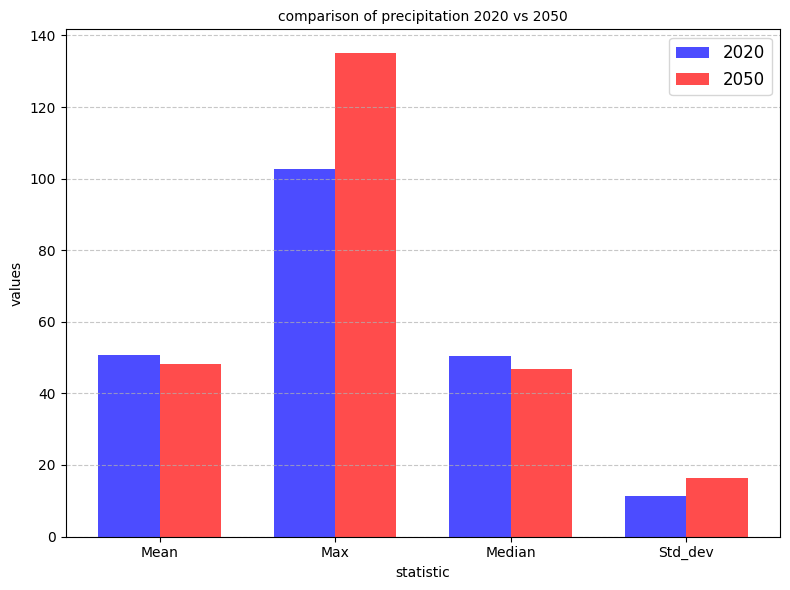

In [16]:
precipitation_2020_statistics= {
    "Mean":np.mean(precipitation_2020),
    "Max":np.max(precipitation_2020),
    "Median":np.median(precipitation_2020),
    "Std_dev":np.std(precipitation_2020)
}
precipitation_2050_statistics={
    "Mean":np.mean(precipitation_2050),
    "Max":np.max(precipitation_2050),
    "Median":np.median(precipitation_2050),
    "Std.dev":np.std(precipitation_2050)
}
#Comparing the precipitation data in barchart
categories=list(precipitation_2020_statistics.keys())
values_2020=list(precipitation_2020_statistics.values())
values_2050=list(precipitation_2050_statistics.values())

x=np.arange(len(categories))
width=0.35

plt.figure(figsize=(8,6))
plt.bar(x-width/2,values_2020,width,label='2020',color='blue',alpha=0.7)
plt.bar(x+width/2,values_2050,width,label='2050',color='red',alpha=0.7)

plt.xlabel("statistic",fontsize=10)
plt.ylabel("values",fontsize=10)
plt.title("comparison of precipitation 2020 vs 2050",fontsize=10)
plt.xticks(x,categories,fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

#FINDINGS:-

Mean and Median Precipitation are slightly lower in 2050 compared to 2020, indicating a small decline in overall and typical rainfall levels.

Maximum Precipitation shows a significant increase in 2050, suggesting that extreme rainfall events are expected to become more intense.

Standard Deviation is higher in 2050, pointing to increased variability and less predictability in precipitation patterns.

#CONCLUSIONS:-

These trends suggest that while average rainfall may decrease slightly, the intensity and unpredictability of rainfall are projected to rise by 2050, which could have implications for flood risk, water resource management, and climate resilience planning.



Text(0.5, 1.0, 'precipitation 2020 vs 2050')

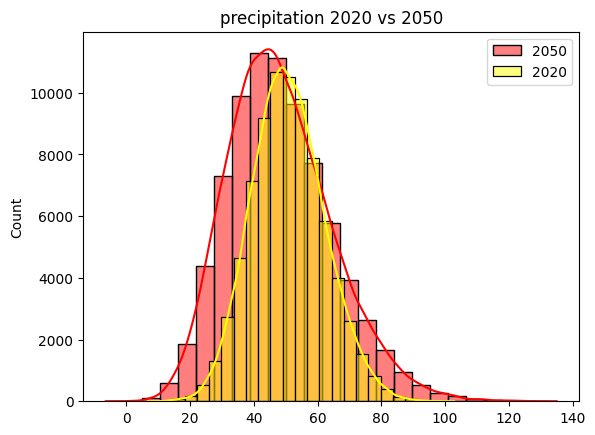

In [20]:
#Histogram plot for distribution of precipitation of 2020 vs 2050
sns.histplot(precipitation_2050.flatten(),color='red',label='2050',bins=25,kde=True)
sns.histplot(precipitation_2020.flatten(),color='yellow',label='2020',bins=25,kde=True)

plt.legend()
plt.title('precipitation 2020 vs 2050')

#Findings:-

-The peak (mode) of the 2050 precipitation (red) is slightly shifted to the left compared to 2020 (yellow), suggesting a decrease in typical daily precipitation.

-The 2050 distribution is wider and flatter, indicating a greater variability in precipitation levels.

-The tails of the 2050 curve extend further, especially on the higher end, aligning with the earlier observation of an increase in extreme precipitation events.

-In contrast, 2020's distribution is more tightly centered, implying more consistent and less extreme rainfall.
#Conclusions:-
-These findings reinforce the likelihood of more erratic and intense weather patterns by 2050, with fewer average days and more extremes—both low and high—in precipitation.

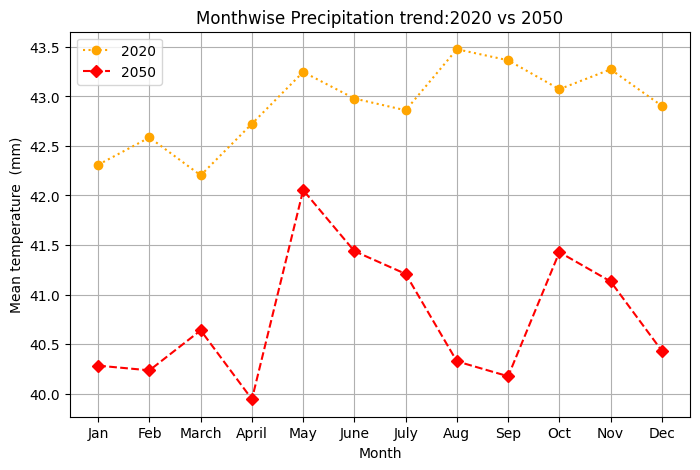

In [23]:
#Comparing month wise precipitation 2020 vs 2050
plt.figure(figsize=(8,5))
plt.plot(range(1,13),get_month_mean_value(precipitation_2020),marker='o',linestyle='dotted',color='orange',label='2020')
plt.plot(range(1,13),get_month_mean_value(precipitation_2050),marker='D',linestyle='--',color='red',label='2050')    
plt.xticks(range(1,13),["Jan","Feb","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Mean temperature  (mm)")
plt.title("Monthwise Precipitation trend:2020 vs 2050")
plt.legend()
plt.grid()
plt.show()  



#Findings :
-The monthly precipitation trends between 2020 and 2050 show a consistent pattern of decline across all months in the year 2050:

-Overall lower precipitation is observed in 2050 (red dashed line) compared to 2020 (yellow dotted line), with nearly every month showing reduced values.

-The gap between the two years is most prominent from May to September, which are typically crucial months for agriculture and water resource planning.

-The trend in 2050 also appears more irregular and variable, whereas 2020 shows a relatively stable and smooth monthly pattern.
#Conclusions:
This indicates a projected reduction in average monthly precipitation by 2050, along with increased variability, which may pose challenges for seasonal water availability and climate adaptability.